<a href="https://colab.research.google.com/github/Satwikram/Explainable-AI-Scene-Classification/blob/main/Explainable%20AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

**Explainable AI: Scene Classification**

In [2]:
! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json


mkdir: cannot create directory ‘/root/.kaggle’: File exists


### Downloading Dataset

In [3]:
! kaggle datasets download -d nitishabharathi/scene-classification

 98% 355M/361M [00:06<00:00, 71.0MB/s]
100% 361M/361M [00:06<00:00, 58.0MB/s]


In [ ]:
!unzip /content/scene-classification.zip

### Importing Basic Librarires

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### Loading CSV File

In [6]:
train = pd.read_csv('/content/train-scene classification/train.csv')

In [7]:
train.head()

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0
4,7.jpg,4


In [8]:
train.shape

(17034, 2)

In [9]:
train['image_name'][0]

'0.jpg'

### Lets move to Working Directory where images are present!

In [12]:
%cd /content/train-scene classification/train

/content/train-scene classification/train


### Lets Visualize some Random Images

In [13]:
train['label'].unique()

array([0, 4, 5, 1, 2, 3])

In [14]:
labels = {0: "Buildings", 1: "Forests", 2: "Mountains", 3: "Glacier", 4: "Sea", 5: "Street"}

In [15]:
labels[0]

'Buildings'

In [18]:
count = 0
for i in range(0, len(train), 2000):
  count = count + 1

print(count)

9


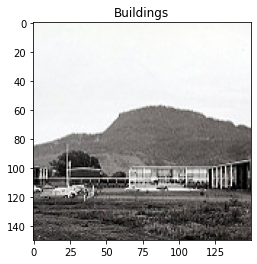

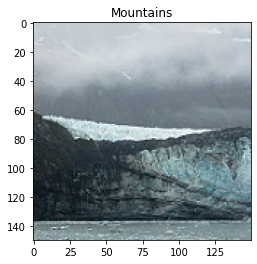

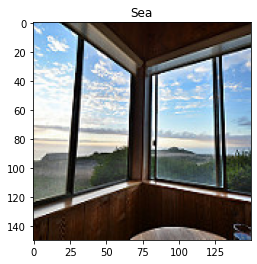

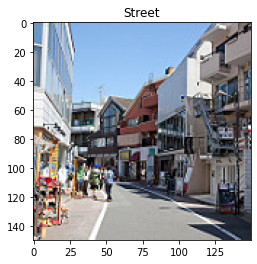

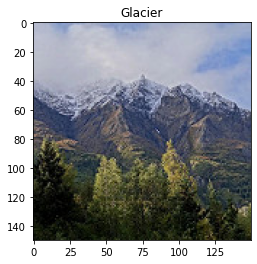

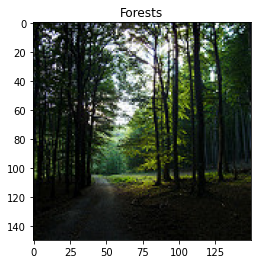

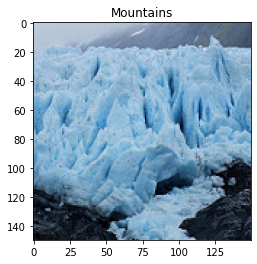

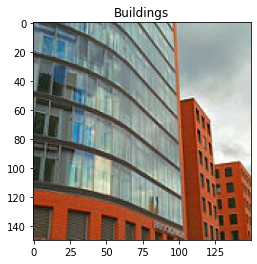

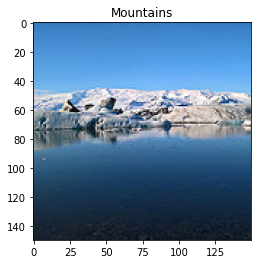

In [19]:
for i in range(0, len(train), 2000):
  plt.imshow(plt.imread(train['image_name'][i]))
  plt.title(labels[train['label'][i]])
  plt.show()

### Lets Create Image Dataset

In [20]:
train.head(4)

,image_name,label
0,0.jpg,0
1,1.jpg,4
2,2.jpg,5
3,4.jpg,0


In [21]:
dataset = train.values

In [ ]:
dataset

array([['0.jpg', 0],
       ['1.jpg', 4],
       ['2.jpg', 5],
       ...,
       ['24329.jpg', 3],
       ['24332.jpg', 5],
       ['24334.jpg', 2]], dtype=object)

In [ ]:
type(dataset)

numpy.ndarray

### Taking X and Y

In [ ]:
X = []
y = []

In [ ]:
for i in range(len(dataset)):

  X.append(plt.imread(dataset[i][0]))
  y.append(dataset[i][1])

In [ ]:
print("Appended",len(X),"Images")


Appended 17034 Images


In [ ]:
len(y)


17034

### Splitting Data into Train and Test

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

Text(0.5, 1.0, 'Buildings')

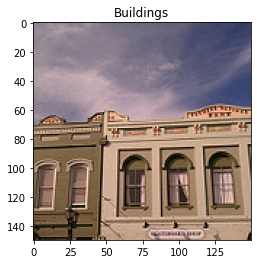

In [ ]:
plt.imshow(X[1000])
plt.title(labels[y[1000]])

In [ ]:
int(0.2 * len(X))

3406

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 150)

In [ ]:
X_train.shape

(13627,)

In [ ]:
y_train.shape

(13627,)

### plotting Pie Chart

In [ ]:
import plotly.express as px

In [ ]:
plt.figure(figsize = (5, 5))
fig = px.pie(values = train['label'].value_counts(), color = train['label'].unique(), title = 'Image Classes')
fig.show()

<Figure size 360x360 with 0 Axes>

### Normalizing the Images

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Data Augmentation

In [ ]:
df_train = pd.DataFrame({'Images': X_train, 'Labels': 'Y_train'}) 